# Perform Anamoly detection on given dataset for fraud detection - creditcard.csvPreview the document

1. Determine number of fraud cases in smaller dataset

2. Visualise the outliers in the data

3. Plot the matrix between important features.

4. Check accuracy of the fit model

In [13]:
import pandas as pd 

In [14]:
df_data = pd.read_csv('CreditCard-2.csv')

In [15]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df_data.shape

(301, 31)

In [17]:
df_data = df_data.drop_duplicates()
print(df_data.shape)

(296, 31)


In [20]:
# Import important packages
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
# Importing KNN module from PyOD
from pyod.models.knn import KNN 
from pyod.models.ocsvm import OCSVM 
# Import the utility function for model evaluation
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.preprocessing import StandardScaler
#from cf_matrix import make_confusion_matrix 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

# set seed
np.random.seed(123)

In [21]:
#check missing data 
df_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Distrubution of Fraud and Normal case were class= 1 or 0

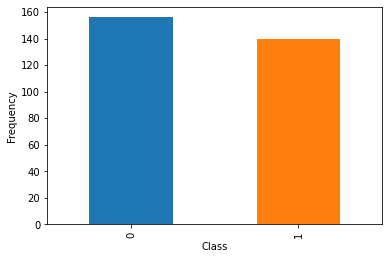

In [24]:
count_class = pd.value_counts(df_data['Class'],sort = True)
count_class.plot(kind='bar')
plt.title = ("Transaction and Class distribution")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



In [25]:
#Normalising the amount column.
#df_data['Amount'] = StandardScaler().fit_transform(df_data['Amount'].values.reshape(-1,1))



In [26]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
X = df_data.drop(['Class'], axis=1) 
y = df_data['Class']

In [ ]:
X['Amount']=StandardScaler().fit_transform(X['Amount'].values.reshape(-1,1))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [31]:
# create the KNN model
clf_knn = KNN(contamination=0.172, n_neighbors = 5,n_jobs=-1)

clf_knn.fit(X_train)

KNN(algorithm='auto', contamination=0.172, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [32]:
# Get the prediction labels of the training data 
y_train_pred = clf_knn.labels_ # binary labels (0: inliers, 1: outliers) 
# Outlier scores 
y_train_scores = clf_knn.decision_scores_ 

In [33]:
y_train_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_train, y_train_pred) 
 
print ('Confusion Matrix:')
print(results) 
print( 'Accuracy Score :',accuracy_score(y_train, y_train_pred) )
print ('Report : ')
print (classification_report(y_train, y_train_pred) )

Confusion Matrix:
[[124   0]
 [ 71  41]]
Accuracy Score : 0.6991525423728814
Report : 
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       124
           1       1.00      0.37      0.54       112

    accuracy                           0.70       236
   macro avg       0.82      0.68      0.66       236
weighted avg       0.81      0.70      0.66       236



# Prediction on Test Data

In [38]:
y_predict = clf_knn.predict(X_test)

In [39]:
results = confusion_matrix(y_test, y_predict) 
 
print ('Confusion Matrix:')
print(results) 
print( 'Accuracy Score :',accuracy_score(y_test, y_predict) )
print ('Report : ')
print (classification_report(y_test, y_predict) )

Confusion Matrix:
[[32  0]
 [19  9]]
Accuracy Score : 0.6833333333333333
Report : 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        32
           1       1.00      0.32      0.49        28

    accuracy                           0.68        60
   macro avg       0.81      0.66      0.63        60
weighted avg       0.80      0.68      0.64        60



In [45]:
numpy_data = np.array(y_predict)
df1 = pd.DataFrame(data=numpy_data, columns=["column1"])

In [49]:
df1.shape

(60, 1)

In [50]:
len(X_test)

60

In [54]:

f) 

279    1
160    0
86     0
84     0
266    1
9      0
44     0
282    1
287    1
94     0
153    0
216    1
62     0
223    1
267    1
48     0
47     0
241    1
233    1
137    0
148    0
172    1
157    0
95     0
118    0
5      0
243    1
256    1
175    1
191    1
198    1
34     0
227    1
221    1
202    1
75     0
187    1
124    0
290    1
207    1
209    1
184    1
182    1
116    0
61     0
231    1
25     0
79     0
6      0
180    1
169    1
145    0
30     0
22     0
250    1
24     0
58     0
149    0
129    0
99     0
Name: Class, dtype: int64

In [56]:
numpy_data1 = np.array(y_test)
df3 = pd.DataFrame(data=numpy_data1, columns=["column2"])

In [57]:
df1.to_csv('y_predict.csv')
df3.to_csv('X_test.csv')

In [27]:
df_data['outlier']= y_train_pred

In [35]:
df = pd.read_csv('creditcard.csv')
df = df.drop_duplicates()
df['outlier']= y_train_pred

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,outlier
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


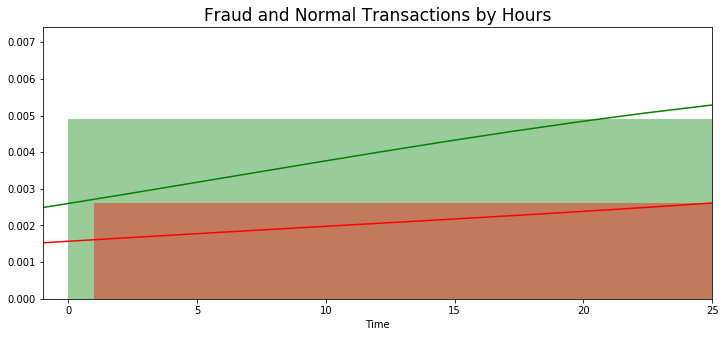

In [38]:

plt.figure(figsize=(12,5))
sns.distplot(df[df['outlier'] == 0]["Time"], color='g')
sns.distplot(df[df['outlier'] == 1]["Time"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

In [41]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore

In [42]:
columns= df.drop('outlier', axis=1).columns
normal= df[df.outlier==0]
fraud= df[df.outlier==1]
sample_size=len(fraud)
significant_features=[]
critical_value=2.58

for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)

V1  is statistically significant
V8  is statistically significant
V9  is statistically significant
V14  is statistically significant
V15  is statistically significant
Amount  is statistically significant


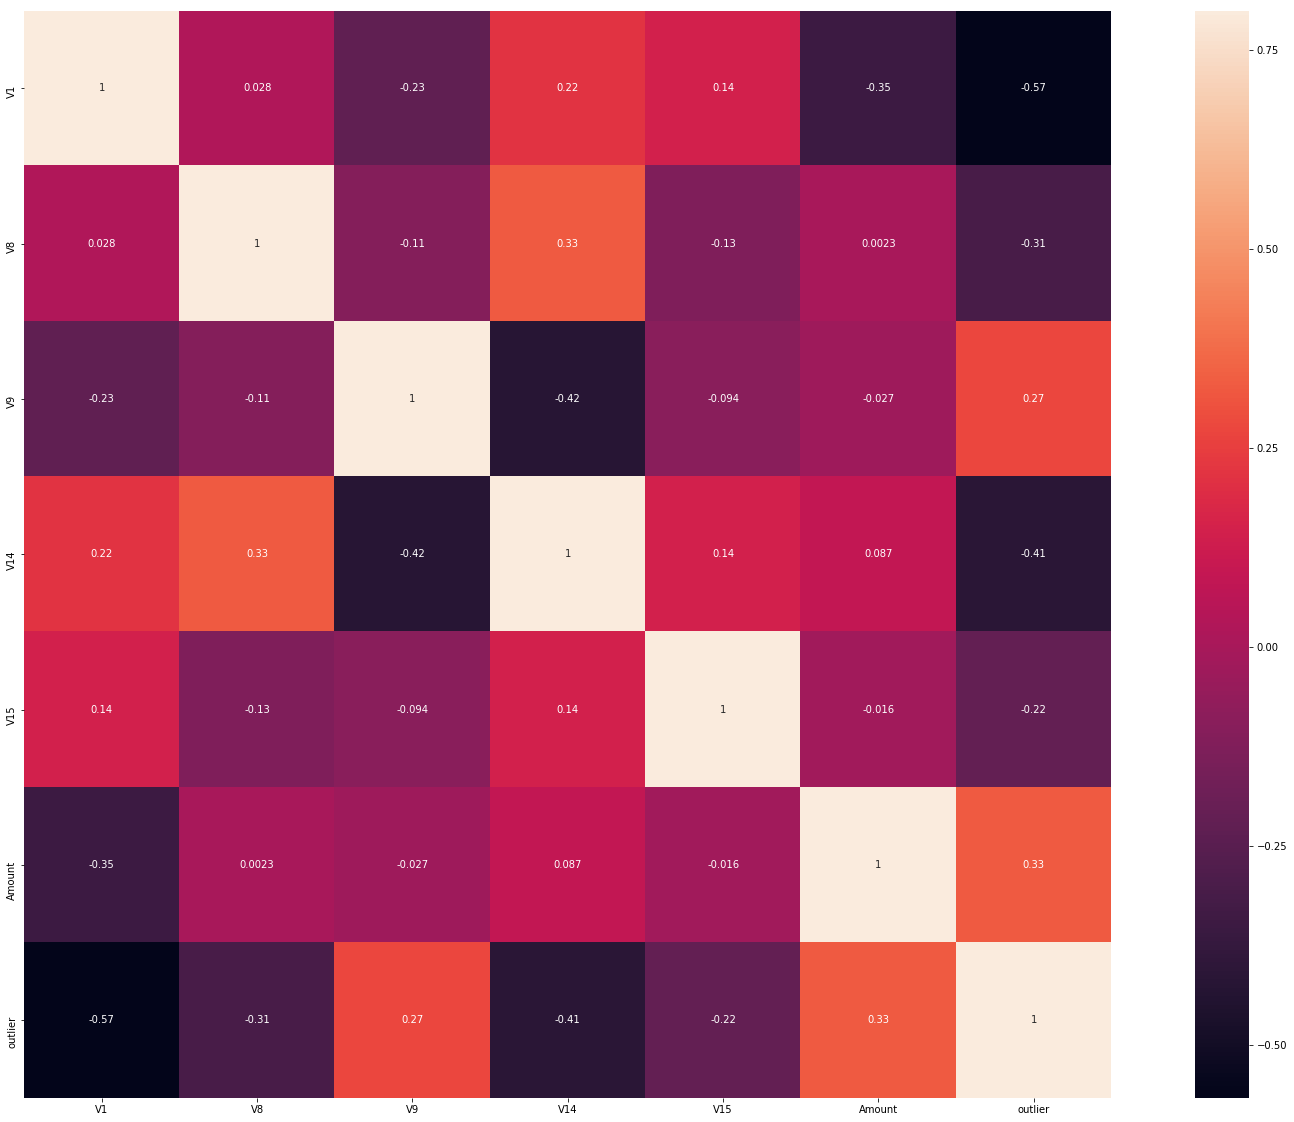

In [43]:
#find the correlation betweeen the variables 

corr = df[['V1','V8','V9','V14','V15','Amount','outlier']].corr() 

fig = plt.figure(figsize=(30,20))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

In [44]:
#4. Check accuracy of the fit model
#It is not possible because target(dependent Variable) was not there to compare.

# Using Lof

In [90]:
clf= LocalOutlierFactor()

In [91]:
y_predict=clf.fit_predict(X,y)

In [97]:
final = X.copy()

In [104]:
final['predict'] = y_predict

In [102]:
final['predict']  = lambda y_predict : 1 if (y_predict == 1 ) else 0

In [105]:
def predict_normal(predict):
    if predict == -1:
        return 0
    else:
        return 1

In [110]:
y_predict

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [107]:
final['predict']  = final.apply(lambda x: predict_normal(x['predict'] ),axis=1)

In [109]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y, final['predict'] ) 
 
print ('Confusion Matrix:')
print(results) 
print( 'Accuracy Score :',accuracy_score(y, final['predict'] ) )
print ('Report : ')
print (classification_report(y, final['predict'] ) )

Confusion Matrix:
[[  1 155]
 [ 33 107]]
Accuracy Score : 0.36486486486486486
Report : 
              precision    recall  f1-score   support

           0       0.03      0.01      0.01       156
           1       0.41      0.76      0.53       140

    accuracy                           0.36       296
   macro avg       0.22      0.39      0.27       296
weighted avg       0.21      0.36      0.26       296



# Using XGBoost

In [58]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [60]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [61]:
classifier=xgboost.XGBClassifier()

In [62]:

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [63]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.1s finished



 Time taken: 0 hours 0 minutes and 20.34 seconds.


In [64]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.7, gamma=0.3, learning_rate=0.2,
              max_delta_step=0, max_depth=15, min_child_weight=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

In [65]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [66]:
clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.7, gamma=0.3, learning_rate=0.2,
              max_delta_step=0, max_depth=15, min_child_weight=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

In [68]:
clf.fit(X_train,y_train)

In [71]:
y_test_pred_xg= clf.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test, y_test_pred_xg) 
 
print ('Confusion Matrix:')
print(results) 
print( 'Accuracy Score :',accuracy_score(y_test, y_test_pred_xg) )
print ('Report : ')
print (classification_report(y_test, y_test_pred_xg) )

Confusion Matrix:
[[32  0]
 [ 0 28]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

